In [2]:
import os
dir_notebook = os.getenv( "HOME" )
file_include = dir_notebook + "/_include.ipynb"
%run $file_include

In [3]:
dir_rhodo_aa = "/home/j1lim/rhodoferax/genome/amino_acid/"
lst_file = ["Rhodoferax_antarcticus_DSM_24876", "Rhodoferax_fermentans_JCM_7819", 
            "Rhodoferax_saidenbachensis_DSM_22694", "Rhodoferax_sp.DCY110", 
            "Rhodoferax_antarcticus_ANT.BR", "Rhodoferax_saidenbachensis_ED16", 
            "Rhodoferax_ferrireducens_T118", "Rhodoferax_sp.TS-BS-61-7", 
            "Rhodoferax_sp.YR267"]
print lst_file

['Rhodoferax_antarcticus_DSM_24876', 'Rhodoferax_fermentans_JCM_7819', 'Rhodoferax_saidenbachensis_DSM_22694', 'Rhodoferax_sp.DCY110', 'Rhodoferax_antarcticus_ANT.BR', 'Rhodoferax_saidenbachensis_ED16', 'Rhodoferax_ferrireducens_T118', 'Rhodoferax_sp.TS-BS-61-7', 'Rhodoferax_sp.YR267']


In [3]:
db_file = "/media/sf_j1/Rhodoferax/heatmap/Fur_seq.fasta"
usearch = "/home/j1lim/Usearch/usearch"
udb = "/media/sf_j1/Rhodoferax/heatmap/Fur_seq.udb"

!$usearch -makeudb_ublast $db_file -output $udb

usearch v8.0.1623_i86linux32, 4.0Gb RAM (11.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: 20080600@hanmail.net

00:00  40Mb  100.0% Reading /media/sf_j1/Rhodoferax/heatmap/Fur_seq.fasta
00:00 6.1Mb  100.0% Masking                                              
00:00  18Mb  100.0% Word stats
00:00  18Mb  100.0% Alloc rows
00:00  18Mb  100.0% Build index
00:00  14Mb  100.0% Rows       
00:00  14Mb Buffers     
00:00  31Mb  100.0% Seqs


In [4]:
from IPython.display import clear_output

num_ = 0
for x in lst_file:
    if num_ % 10 == 0:
        clear_output()
    dir_file = dir_rhodo_aa + x + '_aa.fa'
    result = "/media/sf_j1/Rhodoferax/heatmap/usearch/raw/" + x + '.aln'
    !$usearch -ublast $dir_file -db $udb -evalue 1e-9 -alnout $result
    #break
    num_ += 1
print 'Done'

usearch v8.0.1623_i86linux32, 4.0Gb RAM (11.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: 20080600@hanmail.net

00:00  11Mb  100.0% Reading rows
00:00  11Mb Reading pointers...done.
00:00  11Mb Reading seqs...done.
00:00  77Mb  100.0% Searching Rhodoferax_antarcticus_DSM_24876_aa.fa, 4.4% matched
usearch v8.0.1623_i86linux32, 4.0Gb RAM (11.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: 20080600@hanmail.net

00:00  11Mb  100.0% Reading rows
00:00  11Mb Reading pointers...done.
00:00  11Mb Reading seqs...done.
00:00  77Mb  100.0% Searching Rhodoferax_fermentans_JCM_7819_aa.fa, 6.7% matched
usearch v8.0.1623_i86linux32, 4.0Gb RAM (11.2Gb total), 4 cores
(C) Copyright 2013-15 Robert C. Edgar, all rights reserved.
http://drive5.com/usearch

License: 20080600@hanmail.net

00:00  11Mb  100.0% Reading rows
00:00  11Mb Reading pointers...done.
00:00  11Mb Re

In [8]:
#skip alignment
for x in lst_file:
    file_summary = open('/media/sf_j1/Rhodoferax/heatmap/usearch/usearch_aln_short/' + x + '.aln', 'w')
    file_aln = file('/media/sf_j1/Rhodoferax/heatmap/usearch/raw/' + x + '.aln')
    read_aln = file_aln.read()
    split_aln = read_aln.split('Query >')
    for y in range(1, len(split_aln)):
        split_line = split_aln[y].split('\n')
        file_summary.write('----------------------------------------------------------------------------------\nQuery >')
        for z in split_line:
            if ('       .' in z) or ('       :' in z) or ('       |' in z) or ('Qry' in z) or ('Tgt' in z) or (z == ''):
                continue
            if 'cols' in z:
                file_summary.write("Details > " + z + "\n")
                continue
            file_summary.write(z + '\n')
    file_summary.close()
print 'Done'

Done


In [4]:
dir_usearch_short = "/media/sf_j1/Rhodoferax/heatmap/usearch/usearch_aln_short/"
file_usearch_short = os.listdir(dir_usearch_short)
print file_usearch_short

['Rhodoferax_antarcticus_ANT.BR.aln', 'Rhodoferax_antarcticus_DSM_24876.aln', 'Rhodoferax_fermentans_JCM_7819.aln', 'Rhodoferax_ferrireducens_T118.aln', 'Rhodoferax_saidenbachensis_DSM_22694.aln', 'Rhodoferax_saidenbachensis_ED16.aln', 'Rhodoferax_sp.DCY110.aln', 'Rhodoferax_sp.TS-BS-61-7.aln', 'Rhodoferax_sp.YR267.aln']


In [5]:
file_fur = "/media/sf_j1/Rhodoferax/heatmap/Fur_seq.fasta"

In [6]:
lst_fur_name = []
for x in SeqIO.parse(file_fur, "fasta"):
    lst_fur_name.append(x.id)
    #print x.id
    #break
print len(lst_fur_name)

220


In [7]:
lst_total = []

for x in file_usearch_short:
    dir_file_ = file(dir_usearch_short + x)
    r = dir_file_.read()
    dir_file_.close()
    
    dic_name_per = {}
    for i in lst_fur_name:
        dic_name_per[i] = 0
    
    lines = r.split("----------------------------------------------------------------------------------\n")
    for y in range(1, len(lines)):
        line = lines[y]
        spl = line.split("\n")
        des = spl[2]
        des_spl = des.split()
        per = float(des_spl[2][:-1]) / 100
        name = des_spl[-1]
        if dic_name_per[name] < per:
            dic_name_per[name] = per
        #break
    
    lst_temp = []
    for j in lst_fur_name:
        lst_temp.append(dic_name_per[j])
    
    lst_total.append(lst_temp)
    
    #break

In [8]:
print len(lst_total)

9


In [9]:
print len(lst_fur_name)
print len(lst_total[0])
print len(lst_total[1])
print len(lst_total[2])
print len(lst_total[3])
print len(lst_total[4])
print len(lst_total[5])
print len(lst_total[6])
print len(lst_total[7])
print len(lst_total[8])

220
220
220
220
220
220
220
220
220
220


In [10]:
lst_id_0 = []
for x in range(len(lst_total[0])):
    if lst_total[0][x] == lst_total[1][x] == lst_total[2][x] == lst_total[3][x] == lst_total[4][x] == lst_total[5][x] == lst_total[6][x] == lst_total[7][x] == lst_total[8][x] == 0:
        lst_id_0.append(x)
print len(lst_id_0)
print lst_id_0

83
[6, 11, 16, 17, 18, 19, 20, 21, 23, 28, 29, 31, 38, 43, 44, 56, 58, 59, 60, 61, 63, 64, 66, 67, 71, 72, 73, 74, 79, 82, 85, 86, 88, 101, 102, 103, 106, 110, 111, 114, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 134, 139, 140, 141, 143, 146, 147, 149, 157, 164, 170, 172, 173, 174, 175, 178, 186, 187, 188, 192, 194, 195, 201, 202, 205, 206, 213, 217, 218, 219]


In [11]:
for x in range(len(lst_total[0])-1, -1, -1):
    if lst_total[0][x] == lst_total[1][x] == lst_total[2][x] == lst_total[3][x] == lst_total[4][x] == lst_total[5][x] == lst_total[6][x] == lst_total[7][x] == lst_total[8][x] == 0:
        lst_fur_name.pop(x)
        lst_total[0].pop(x)
        lst_total[1].pop(x)
        lst_total[2].pop(x)
        lst_total[3].pop(x)
        lst_total[4].pop(x)
        lst_total[5].pop(x)
        lst_total[6].pop(x)
        lst_total[7].pop(x)
        lst_total[8].pop(x)

In [12]:
print len(lst_fur_name)
print len(lst_total[0])
print len(lst_total[1])
print len(lst_total[2])
print len(lst_total[3])
print len(lst_total[4])
print len(lst_total[5])
print len(lst_total[6])
print len(lst_total[7])
print len(lst_total[8])

137
137
137
137
137
137
137
137
137
137


In [13]:
for x in range(9):
    lst_total[x].append(1)
lst_fur_name.append("maximum")

In [14]:
print len(lst_total[0])
print len(lst_total[1])
print len(lst_total[2])
print len(lst_total[3])
print len(lst_total[4])
print len(lst_total[5])
print len(lst_total[6])
print len(lst_total[7])
print len(lst_total[8])

138
138
138
138
138
138
138
138
138


In [15]:
lst_check = []
for x in range(9):
    #print x, lst_total[x].count(0)
    lst_check.append((lst_total[x].count(0), x))

lst_check.sort()
print lst_check

[(39, 8), (45, 6), (47, 2), (48, 3), (51, 7), (53, 4), (53, 5), (62, 0), (63, 1)]


In [16]:
data_ = []
idx_ = []

for x in lst_check:
    data_.append(lst_total[x[1]])
    idx_.append(lst_file[x[1]])
    #break

print idx_
print data_

['Rhodoferax_sp.YR267', 'Rhodoferax_ferrireducens_T118', 'Rhodoferax_saidenbachensis_DSM_22694', 'Rhodoferax_sp.DCY110', 'Rhodoferax_sp.TS-BS-61-7', 'Rhodoferax_antarcticus_ANT.BR', 'Rhodoferax_saidenbachensis_ED16', 'Rhodoferax_antarcticus_DSM_24876', 'Rhodoferax_fermentans_JCM_7819']
[[0.53, 0, 0, 0.36, 0.34, 0.42, 0.6, 0, 0.58, 0.34, 0.37, 0.35, 0, 0.66, 0.29, 0.45, 0.46, 0.62, 0.26, 0.3, 0.36, 0.45, 0.34, 0, 0.32, 0.3, 0.47, 0.5, 0.42, 0.41, 0.33, 0.54, 0.67, 0.61, 0.27, 0.47, 0.42, 0.46, 0.59, 0, 0, 0.45, 0, 0, 0.53, 0.42, 0.36, 0, 0.43, 0.37, 0.41, 0.61, 0, 0.44, 0.32, 0.27, 0, 0.47, 0, 0, 0, 0, 0.61, 0.51, 0, 0.3, 0, 0.5, 0.47, 0.28, 0, 0.39, 0.3, 0.34, 0.34, 0, 0.29, 0.31, 0.35, 0.27, 0, 0.27, 0.4, 0, 0, 0.29, 0, 0.38, 0.27, 0, 0, 0, 0, 0, 0, 0, 0.41, 0.37, 0.4, 0.37, 0, 0.54, 0.34, 0.29, 0.64, 0, 0, 0.62, 0, 0.38, 0.46, 0.39, 0.49, 0.43, 0, 0.48, 0.3, 0.38, 0.57, 0, 0.56, 0.68, 0.52, 0.63, 0.45, 0.5, 0.45, 0.37, 0.38, 0.38, 0.37, 0.46, 0, 0.29, 0.27, 0, 0.38, 1], [0.49, 0.27, 

In [21]:
lst_min_max = []

for x in lst_total:
    for y in x:
        if (y == 1) or (y == 0):
            continue
        if y not in lst_min_max:
            lst_min_max.append(y)
        #break
    #break

lst_min_max.sort()
print max(lst_min_max)
print min(lst_min_max)
print lst_min_max

0.69
0.22
[0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69]


In [195]:
df = pd.DataFrame(data_, columns = lst_fur_name, index = idx_)
#print df

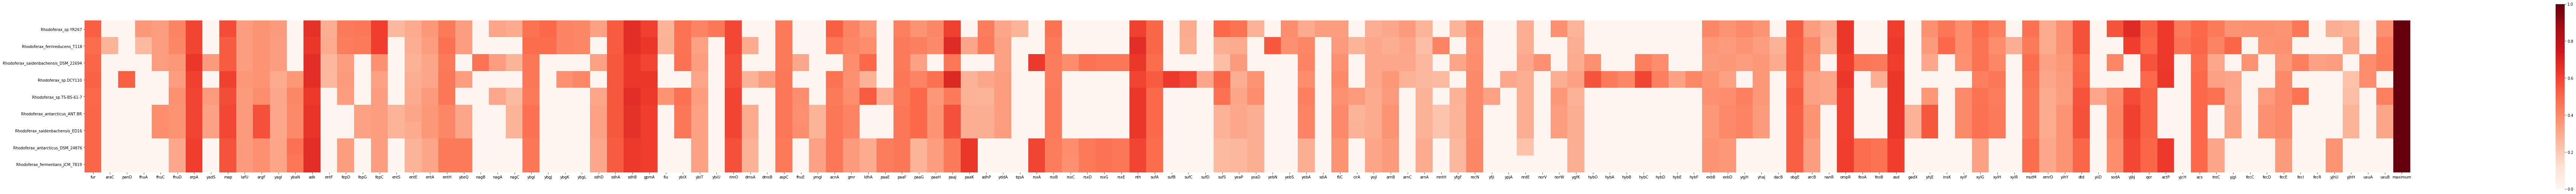

In [211]:
import seaborn as sns

plt.figure(figsize=(len(lst_total[0]), len(lst_file)))
heatmap = sns.heatmap(data = df, annot = False, square = True, cmap ="Reds")

plt.savefig("/media/sf_j1/Rhodoferax/heatmap/rhodoferax_fur.svg", format = 'svg')
plt.savefig("/media/sf_j1/Rhodoferax/heatmap/rhodoferax_fur.png", format = 'png')

plt.show()

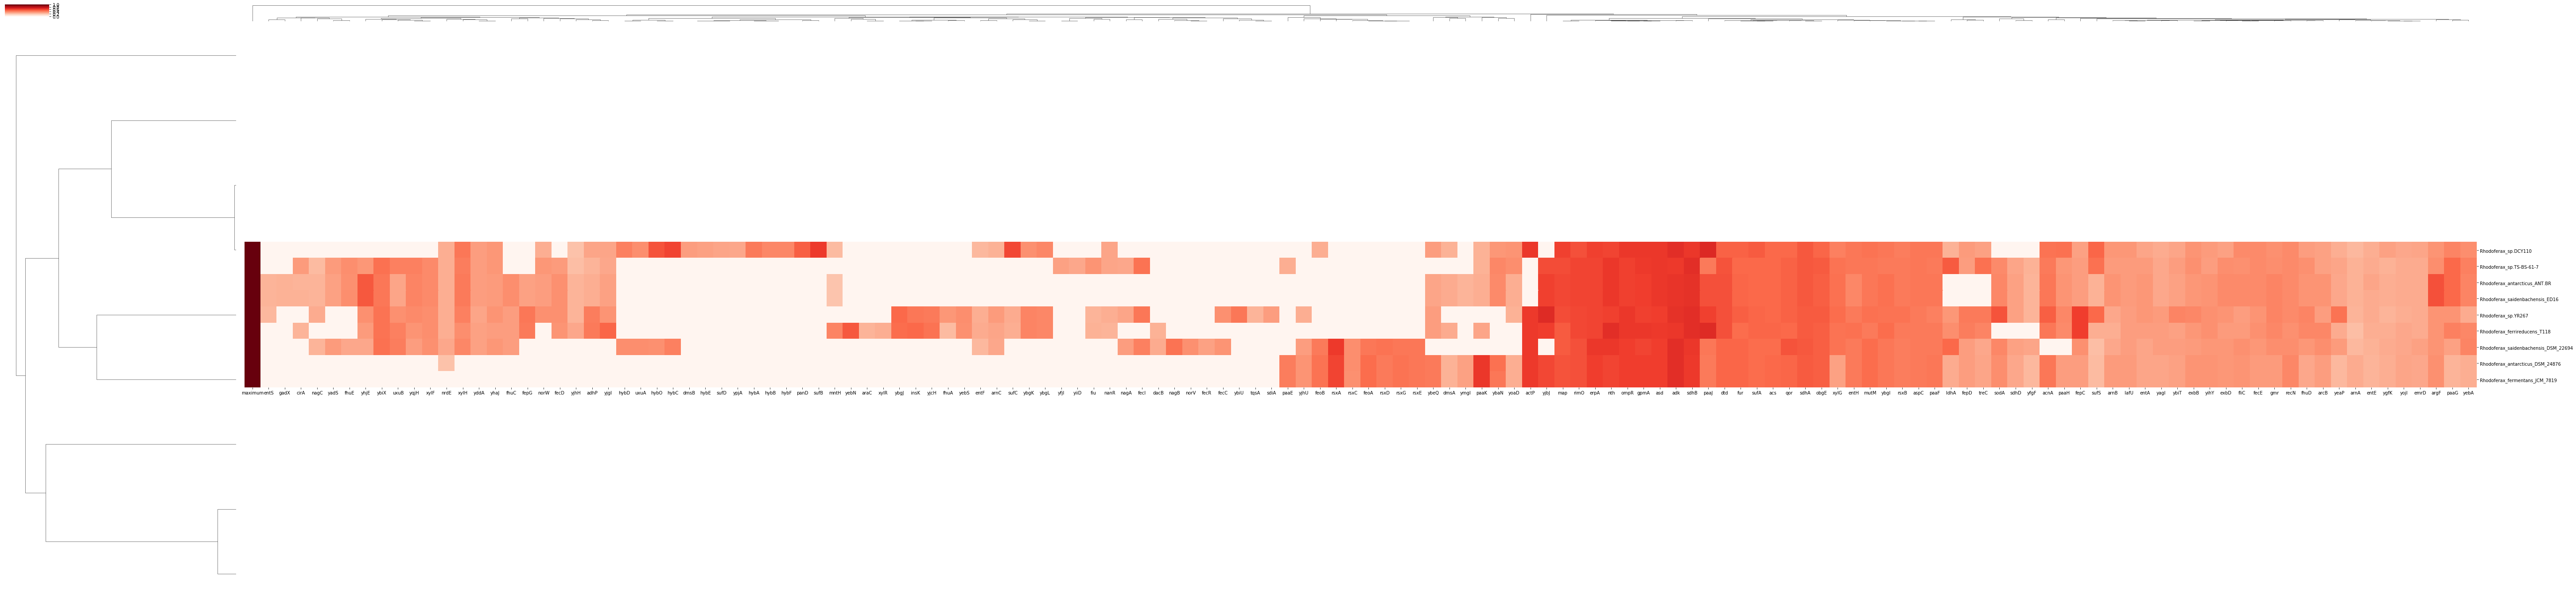

In [210]:
dendrogram = sns.clustermap(data = df, square = True, cmap="Reds", figsize = (100, 25))

plt.savefig("/media/sf_j1/Rhodoferax/heatmap/asdasd.svg", format = 'svg')

plt.show()